In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 


In [63]:
glassds=pd.read_csv('Glass Identification.csv')

In [58]:
glassds.keys()

Index(['number', 'RI', 'Na', 'Mg', 'Al', 'SI', 'K', 'CA', 'BA', 'Fe', 'type'], dtype='object')

In [67]:
glassds.shape

(214, 11)

In [68]:
glassds.head()

,number,RI,Na,Mg,Al,SI,K,CA,BA,Fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [69]:
glassds.tail()

,number,RI,Na,Mg,Al,SI,K,CA,BA,Fe,type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [70]:
glassds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   number  214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   SI      214 non-null    float64
 6   K       214 non-null    float64
 7   CA      214 non-null    float64
 8   BA      214 non-null    float64
 9   Fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [71]:
glassds.isnull().sum()

number    0
RI        0
Na        0
Mg        0
Al        0
SI        0
K         0
CA        0
BA        0
Fe        0
type      0
dtype: int64

In [72]:
glassds.describe()

,number,RI,Na,Mg,Al,SI,K,CA,BA,Fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


number       AxesSubplot(0.125,0.53;0.0945122x0.35)
RI        AxesSubplot(0.238415,0.53;0.0945122x0.35)
Na        AxesSubplot(0.351829,0.53;0.0945122x0.35)
Mg        AxesSubplot(0.465244,0.53;0.0945122x0.35)
Al        AxesSubplot(0.578659,0.53;0.0945122x0.35)
SI        AxesSubplot(0.692073,0.53;0.0945122x0.35)
K         AxesSubplot(0.805488,0.53;0.0945122x0.35)
CA           AxesSubplot(0.125,0.11;0.0945122x0.35)
BA        AxesSubplot(0.238415,0.11;0.0945122x0.35)
Fe        AxesSubplot(0.351829,0.11;0.0945122x0.35)
type      AxesSubplot(0.465244,0.11;0.0945122x0.35)
dtype: object

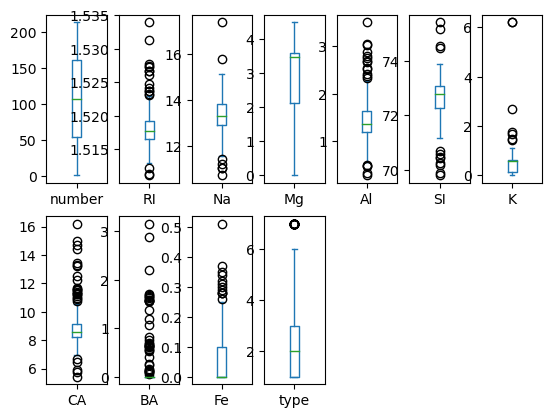

In [73]:
glassds.plot(kind='box',subplots=True, layout=(2,7))

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(glassds))
z

,number,RI,Na,Mg,Al,SI,K,CA,BA,Fe,type
0,1.723976,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451,0.848275
1,1.707788,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451,0.848275
2,1.691601,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451,0.848275
3,1.675413,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451,0.848275
4,1.659226,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451,0.848275
...,...,...,...,...,...,...,...,...,...,...,...
209,1.659226,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451,2.010478
210,1.675413,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451,2.010478
211,1.691601,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451,2.010478
212,1.707788,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451,2.010478


In [75]:
threshold=3
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([7, 1, 2, 5, 7, 8, 1, 5, 7, 7, 7, 1, 7, 7, 9, 9, 4, 5, 8, 4, 6, 4,
       6, 9, 2, 5, 5, 8, 5, 6, 8, 8, 8], dtype=int64))


In [76]:
glassds.skew()

number    0.000000
RI        1.625431
Na        0.454181
Mg       -1.152559
Al        0.907290
SI       -0.730447
K         6.551648
CA        2.047054
BA        3.416425
Fe        1.754327
type      1.114915
dtype: float64

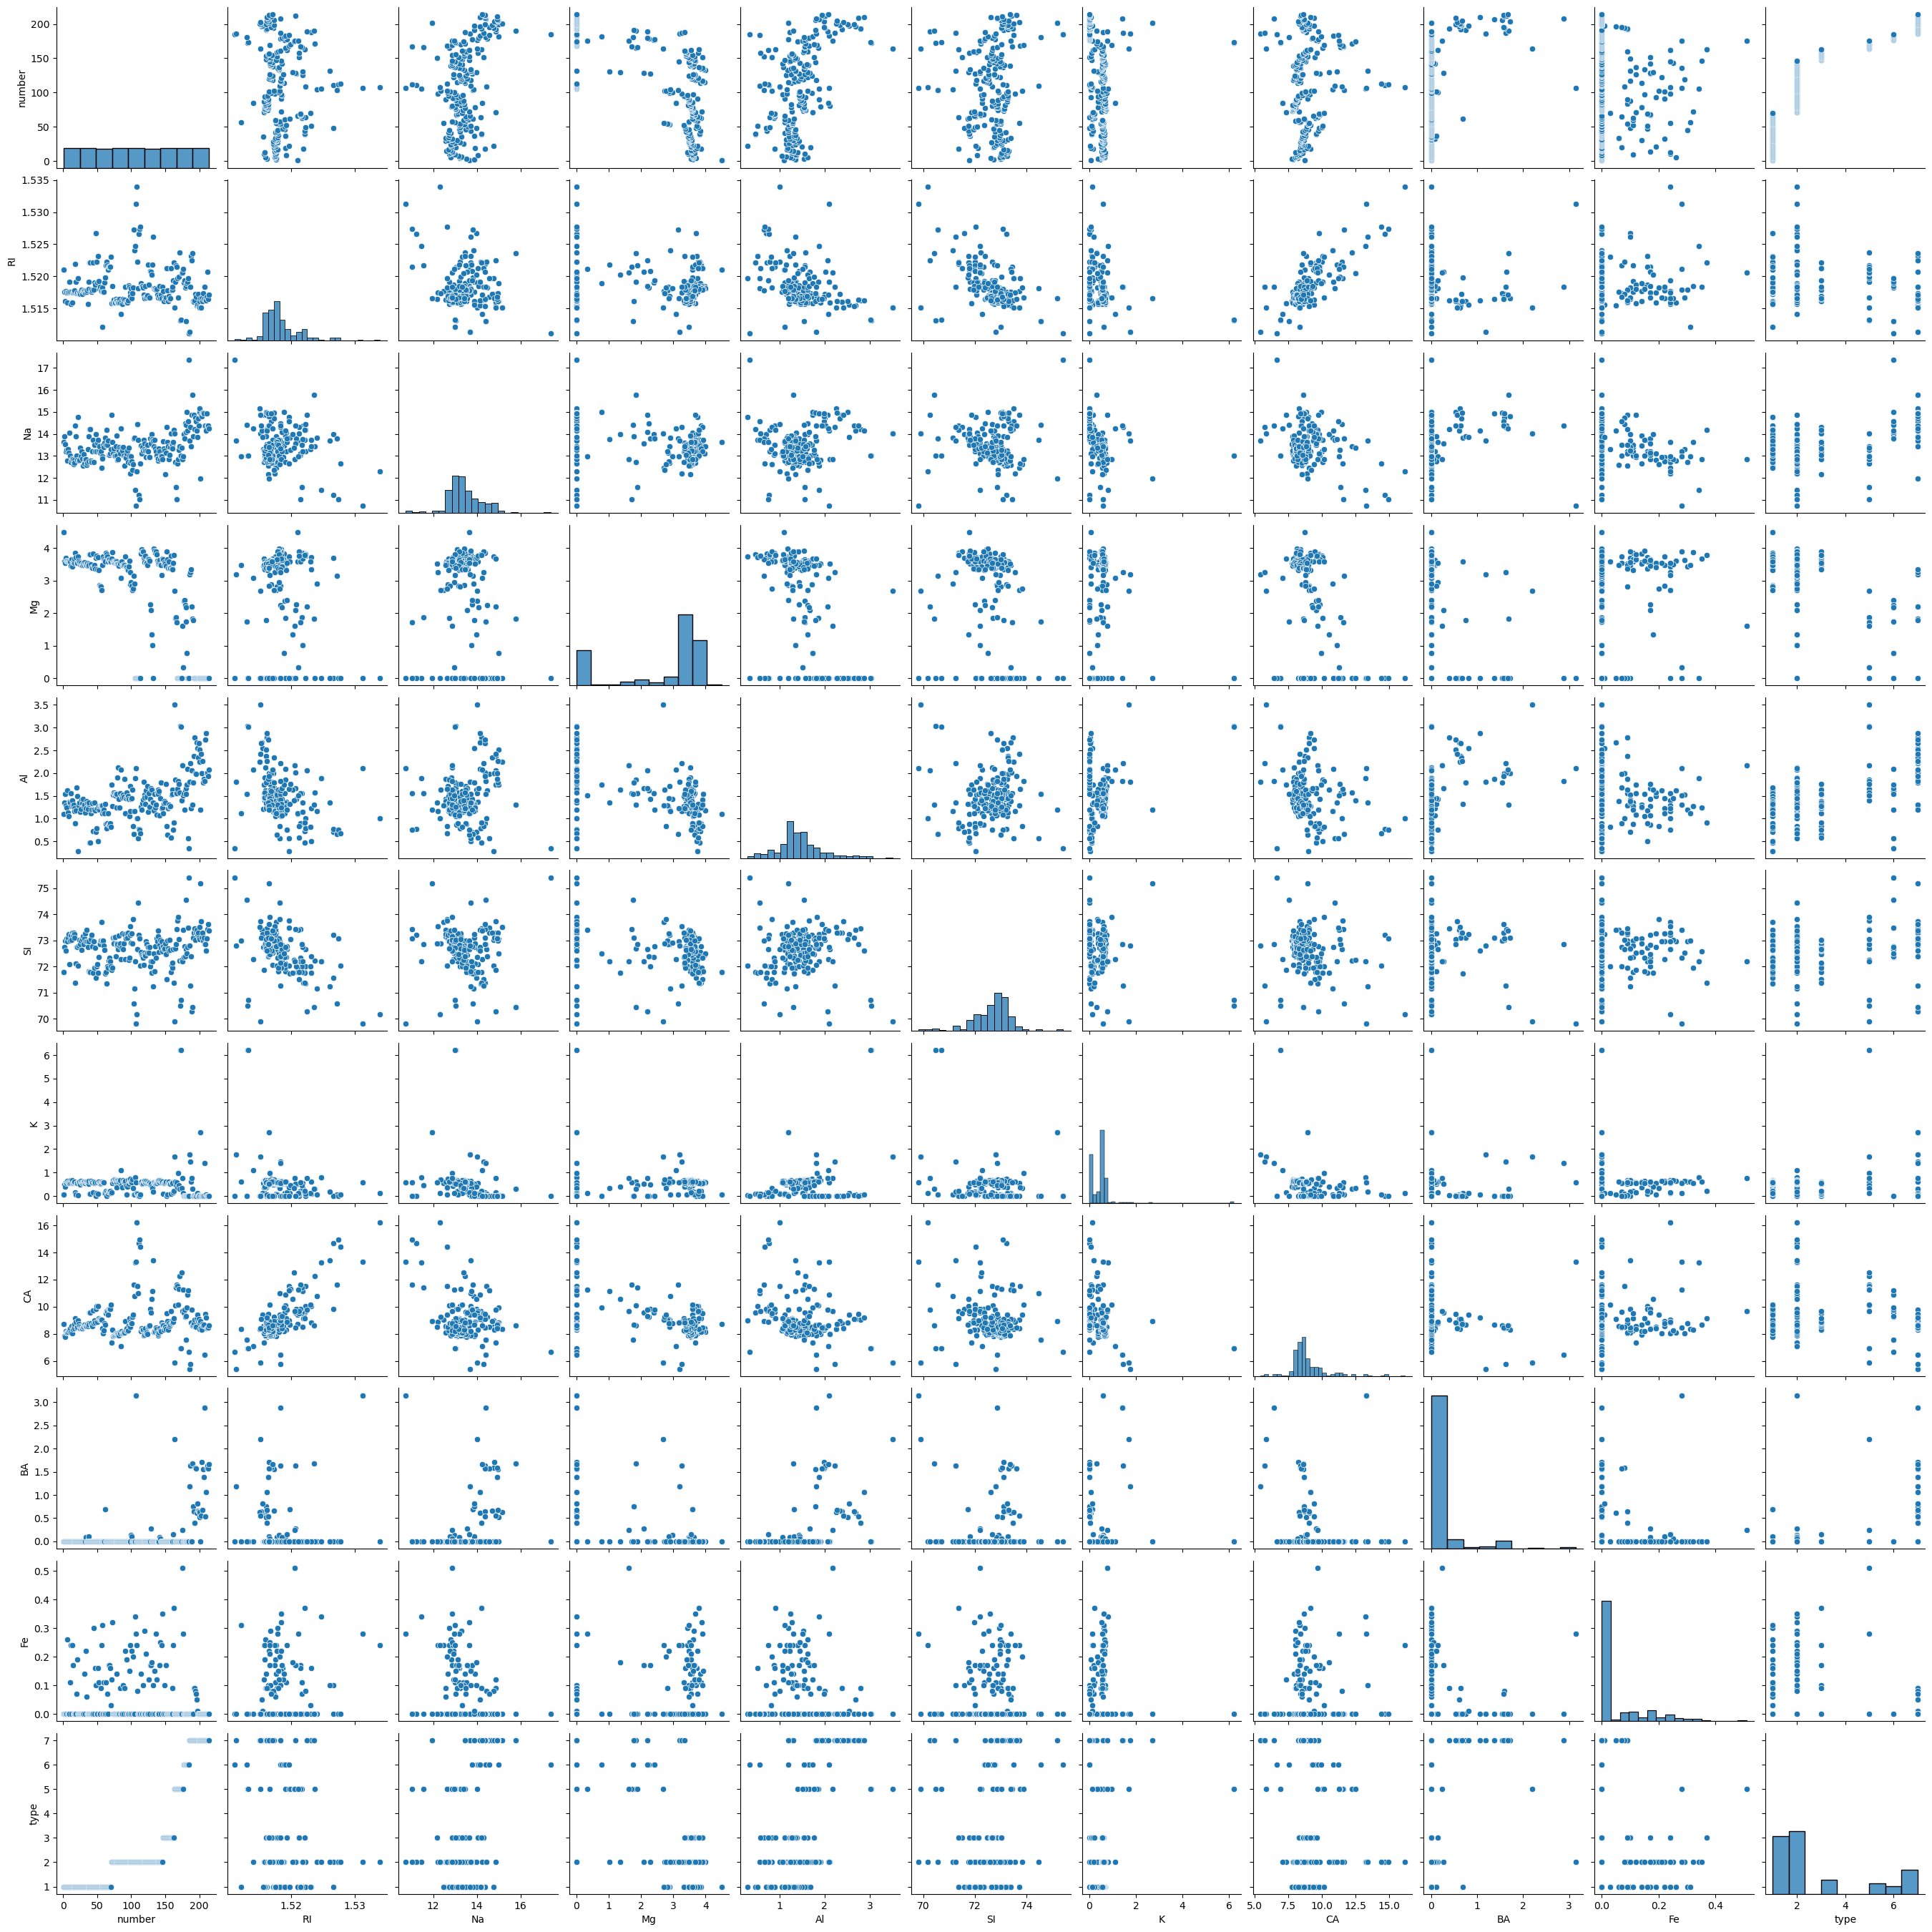

In [77]:
sns.pairplot(glassds)

In [79]:
glass_new=glassds[(z<3).all(axis=1)] #Removing outliers

In [80]:
glass_new.shape

(194, 11)

In [81]:
glassds.shape

(214, 11)

In [83]:
x = glass_new.drop(['number','type'],axis=1)
y = glass_new['type']

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=324)

In [102]:
x_train.shape

(145, 9)

In [103]:
x_test.shape

(49, 9)

In [104]:
y_train.shape

(145,)

In [105]:
y_test.shape

(49,)

In [106]:
 mnb=MultinomialNB()

In [107]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [108]:
predmnb=mnb.predict(x_test)

In [109]:
predmnb

array([1, 2, 1, 1, 7, 2, 1, 1, 7, 2, 2, 5, 1, 1, 1, 1, 1, 1, 2, 7, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 7, 1, 1, 2, 1, 7, 5, 7, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 2], dtype=int64)

In [110]:
print(accuracy_score(y_test,predmnb))

0.6122448979591837


In [111]:
print(confusion_matrix(y_test,predmnb))

[[15  2  0  0  0  0]
 [ 8  8  0  0  0  1]
 [ 4  2  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 2  0  0  0  0  0]
 [ 0  0  0  0  0  5]]


In [112]:
print(classification_report(y_test,predmnb))

              precision    recall  f1-score   support

           1       0.52      0.88      0.65        17
           2       0.67      0.47      0.55        17
           3       0.00      0.00      0.00         6
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         2
           7       0.83      1.00      0.91         5

    accuracy                           0.61        49
   macro avg       0.50      0.56      0.52        49
weighted avg       0.54      0.61      0.55        49



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
def predmnb_function(t):
    t=t.reshape(1,-1)
    pred=mnb.predict(t)
    if pred==1:
        print('building_windows_float_processed') 
    elif pred==2:
        print('building_windows_non_float_processed')
    elif pred==3:  
        print('vehicle_windows_float_processed')
    elif pred==5:  
        print('containers')
    elif pred==6:  
        print('tableware')     
    else:
        print('headlamps')

In [114]:
t=np.array([1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24])

predmnb_function(t)

building_windows_float_processed


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


# KNeighborsClassifier()

In [44]:
knn=KNeighborsClassifier()

In [45]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
predknn=knn.predict(x_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [47]:
print(accuracy_score(y_test,predknn))

0.7333333333333333


In [48]:
print(confusion_matrix(y_test,predknn))

[[9 1 1 0 0 0]
 [3 8 0 0 0 0]
 [3 0 0 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 2]]


In [49]:
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           1       0.60      0.82      0.69        11
           2       0.89      0.73      0.80        11
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.73        30
   macro avg       0.75      0.76      0.75        30
weighted avg       0.71      0.73      0.71        30



In [50]:
def predknn_function(t):
    t=t.reshape(1,-1)
    pred=mnb.predict(t)
    if pred==0:
        print('building_windows_float_processed') 
    elif pred==1:
        print('building_windows_non_float_processed')
    elif pred==2:  
        print('vehicle_windows_float_processed')
    elif pred==3:  
        print('containers')
    elif pred==4:  
        print('tableware')     
    else:
        print('headlamps')

In [51]:
t=np.array([1.51571,12.72,3.46,1.56,73.2,0.67,8.09,0,0.24])


predknn_function(t)

vehicle_windows_float_processed


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
